# ML model training with credit card approval anonymized dataset

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# dataset files location
folder_path = './datasets/'

In [75]:
df_anonim = pd.read_csv(folder_path + 'ccapproval_anonimization.csv')

In [76]:
df_anonim.head()

id gender car owns_house                                edutp  \
0  *      F   N          Y  {Academic degree, Higher education}   
1  *      F   N          Y  {Academic degree, Higher education}   
2  *      F   N          Y  {Academic degree, Higher education}   
3  *      F   N          Y  {Academic degree, Higher education}   
4  *      F   N          Y  {Academic degree, Higher education}   

                                  houtp           age  has_mobilephone  \
0  {Co-op apartment, House / apartment}  [21.0, 30.0[              1.0   
1  {Co-op apartment, House / apartment}  [21.0, 30.0[              1.0   
2  {Co-op apartment, House / apartment}  [21.0, 30.0[              1.0   
3  {Co-op apartment, House / apartment}  [21.0, 30.0[              1.0   
4  {Co-op apartment, House / apartment}  [21.0, 30.0[              1.0   

   has_phone            inc  ... wkphone  email  occyp year_employed chldno  \
0        1.0  [101.3, 99.0[  ...       1      0      *    [0.0, 1.9[      0   
1        1.0  [101.3, 99.0[  ...       1      0      *    [0.0, 1.9[      0   
2        0.0  [101.3, 99.0[  ...       0      0      *    [0.0, 1.9[      0   
3        0.0  [101.3, 99.0[  ...       0      0      *    [0.0, 1.9[      0   
4        0.0  [101.3, 99.0[  ...       0      0      *    [0.0, 1.9[      0   

            famtp famsize  begin_month  target  statementdate  
0  Civil marriage       2           -5       0        12/9/20  
1  Civil marriage       2           -2       0       12/12/20  
2  Civil marriage       2          -10       0        12/4/20  
3  Civil marriage       2          -12       0        12/2/20  
4  Civil marriage       2          -54       0        12/8/16  

[5 rows x 21 columns]

In [77]:
df_anonim.shape

(25134, 21)

## Data processing
Feature dataset cleaning and shaping - pre prepation for training phase

In [78]:
# Check for null values
df_anonim.isnull().sum()

id                 0
gender             0
car                0
owns_house         0
edutp              0
houtp              0
age                0
has_mobilephone    0
has_phone          0
inc                0
inctp              0
wkphone            0
email              0
occyp              0
year_employed      0
chldno             0
famtp              0
famsize            0
begin_month        0
target             0
statementdate      0
dtype: int64

In [79]:
# remove unecessary features
df_anonim = df_anonim.drop(['id', 'statementdate', 'begin_month'], axis=1)

In [80]:
df_anonim.columns

Index(['gender', 'car', 'owns_house', 'edutp', 'houtp', 'age',
       'has_mobilephone', 'has_phone', 'inc', 'inctp', 'wkphone', 'email',
       'occyp', 'year_employed', 'chldno', 'famtp', 'famsize', 'target'],
      dtype='object')

In [81]:
df_anonim.head()

gender car owns_house                                edutp  \
0      F   N          Y  {Academic degree, Higher education}   
1      F   N          Y  {Academic degree, Higher education}   
2      F   N          Y  {Academic degree, Higher education}   
3      F   N          Y  {Academic degree, Higher education}   
4      F   N          Y  {Academic degree, Higher education}   

                                  houtp           age  has_mobilephone  \
0  {Co-op apartment, House / apartment}  [21.0, 30.0[              1.0   
1  {Co-op apartment, House / apartment}  [21.0, 30.0[              1.0   
2  {Co-op apartment, House / apartment}  [21.0, 30.0[              1.0   
3  {Co-op apartment, House / apartment}  [21.0, 30.0[              1.0   
4  {Co-op apartment, House / apartment}  [21.0, 30.0[              1.0   

   has_phone            inc                 inctp  wkphone  email occyp  \
0        1.0  [101.3, 99.0[  Commercial associate        1      0     *   
1        1.0  [101.3, 99.0[  Commercial associate        1      0     *   
2        0.0  [101.3, 99.0[               Working        0      0     *   
3        0.0  [101.3, 99.0[               Working        0      0     *   
4        0.0  [101.3, 99.0[               Working        0      0     *   

  year_employed  chldno           famtp  famsize  target  
0    [0.0, 1.9[       0  Civil marriage        2       0  
1    [0.0, 1.9[       0  Civil marriage        2       0  
2    [0.0, 1.9[       0  Civil marriage        2       0  
3    [0.0, 1.9[       0  Civil marriage        2       0  
4    [0.0, 1.9[       0  Civil marriage        2       0

In [82]:
df_anonim.dtypes

gender              object
car                 object
owns_house          object
edutp               object
houtp               object
age                 object
has_mobilephone    float64
has_phone          float64
inc                 object
inctp               object
wkphone              int64
email                int64
occyp               object
year_employed       object
chldno               int64
famtp               object
famsize              int64
target               int64
dtype: object

In [83]:
df_anonim['has_mobilephone'] = df_anonim['has_mobilephone'].astype(int)
print(df_anonim['has_mobilephone'])

0        1
1        1
2        1
3        1
4        1
        ..
25129    1
25130    1
25131    1
25132    1
25133    1
Name: has_mobilephone, Length: 25134, dtype: int64


In [84]:
df_anonim.has_mobilephone.sum()

25134

In [85]:
# remove unecessary features
df_anonim = df_anonim.drop(['has_mobilephone'], axis=1)

In [86]:
df_anonim.shape

(25134, 17)

In [87]:
categorical_columns = df_anonim.select_dtypes(['object']).columns
print(categorical_columns)

Index(['gender', 'car', 'owns_house', 'edutp', 'houtp', 'age', 'inc', 'inctp',
       'occyp', 'year_employed', 'famtp'],
      dtype='object')


In [88]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical data into numerical
label_encoder = LabelEncoder()

for colname in categorical_columns:
    df_anonim[colname] = label_encoder.fit_transform(df_anonim[colname])

In [89]:
df_anonim.head()

gender  car  owns_house  edutp  houtp  age  has_phone  inc  inctp  wkphone  \
0       0    0           1      1      1    1        1.0    1      0        1   
1       0    0           1      1      1    1        1.0    1      0        1   
2       0    0           1      1      1    1        0.0    1      4        0   
3       0    0           1      1      1    1        0.0    1      4        0   
4       0    0           1      1      1    1        0.0    1      4        0   

   email  occyp  year_employed  chldno  famtp  famsize  target  
0      0      0              1       0      1        2       0  
1      0      0              1       0      1        2       0  
2      0      0              1       0      1        2       0  
3      0      0              1       0      1        2       0  
4      0      0              1       0      1        2       0

In [90]:
df_anonim.describe()

gender           car    owns_house         edutp         houtp  \
count  25134.000000  25134.000000  25134.000000  25134.000000  25134.000000   
mean       0.378133      0.418397      0.654930      2.102889      1.007440   
std        0.484931      0.493306      0.475401      1.153171      0.602836   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      1.000000      1.000000   
50%        0.000000      0.000000      1.000000      3.000000      1.000000   
75%        1.000000      1.000000      1.000000      3.000000      1.000000   
max        1.000000      1.000000      1.000000      3.000000      3.000000   

                age     has_phone           inc         inctp       wkphone  \
count  25134.000000  25134.000000  25134.000000  25134.000000  25134.000000   
mean       2.166388      0.292791      7.331782      2.681825      0.273812   
std        1.242815      0.455052      5.494901      1.773317      0.445923   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      4.000000      0.000000      0.000000   
50%        2.000000      0.000000      7.000000      4.000000      0.000000   
75%        3.000000      1.000000     10.000000      4.000000      1.000000   
max        5.000000      1.000000     20.000000      4.000000      1.000000   

              email    occyp  year_employed        chldno         famtp  \
count  25134.000000  25134.0   25134.000000  25134.000000  25134.000000   
mean       0.100660      0.0       7.834408      0.512334      1.994589   
std        0.300885      0.0       6.438458      0.787785      1.089466   
min        0.000000      0.0       0.000000      0.000000      0.000000   
25%        0.000000      0.0       1.000000      0.000000      2.000000   
50%        0.000000      0.0       7.000000      0.000000      2.000000   
75%        0.000000      0.0      15.000000      1.000000      2.000000   
max        1.000000      0.0      17.000000     19.000000      5.000000   

            famsize        target  
count  25134.000000  25134.000000  
mean       2.294064      0.016790  
std        0.947590      0.128486  
min        1.000000      0.000000  
25%        2.000000      0.000000  
50%        2.000000      0.000000  
75%        3.000000      0.000000  
max       20.000000      1.000000

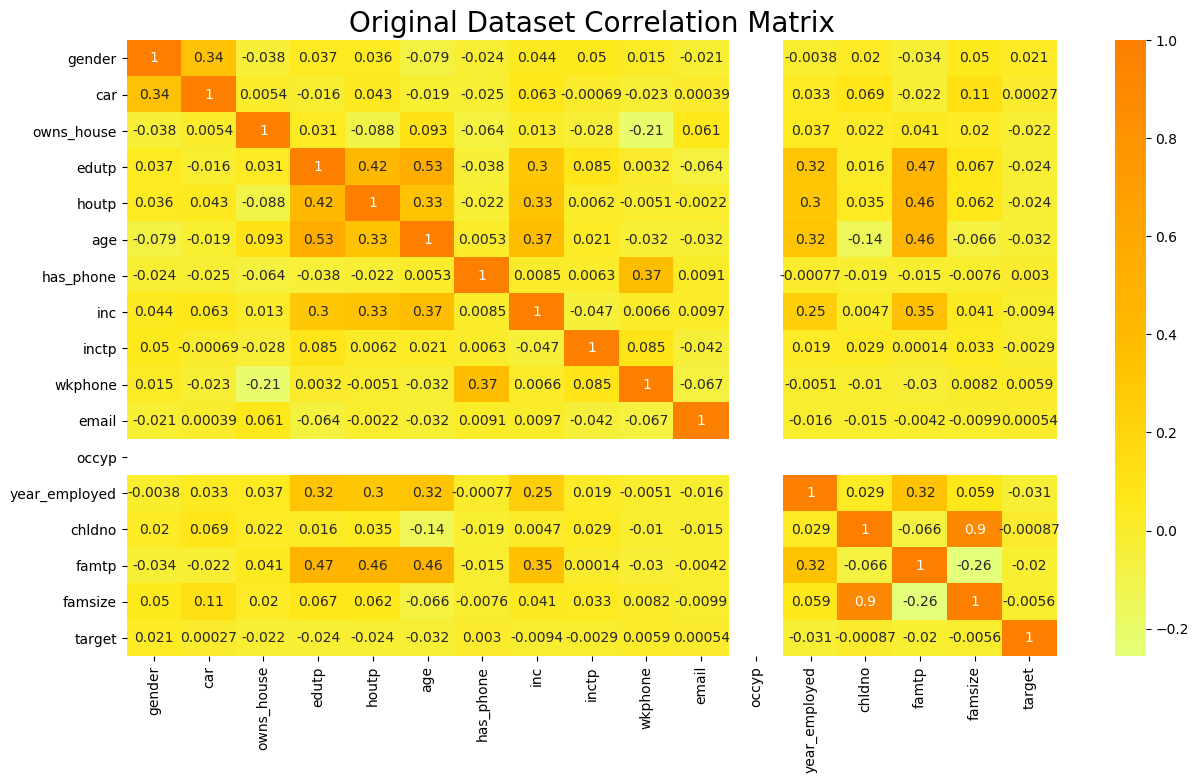

In [91]:
# check features correlation
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df_anonim.corr(), cmap = 'Wistia', annot = True)
plt.title('Original Dataset Correlation Matrix', fontsize = 20)
plt.show()

Going to visualize some features to understand them better

In [92]:
df_anonim['gender'].value_counts()

0    15630
1     9504
Name: gender, dtype: int64

In [93]:
df_anonim['has_phone'].value_counts()

0.0    17775
1.0     7359
Name: has_phone, dtype: int64

In [94]:
df_anonim['chldno'].value_counts()

0     15908
1      6118
2      2715
3       312
4        57
5        18
14        3
7         2
19        1
Name: chldno, dtype: int64

In [95]:
df_anonim['target'].value_counts()

0    24712
1      422
Name: target, dtype: int64

In [96]:
df_anonim['inc'].value_counts()

4     3279
0     3133
6     2427
9     2298
1     2289
7     2167
8     1579
11    1345
20    1327
13    1294
10     887
14     734
17     606
5      429
3      396
15     348
16     307
19     115
18     104
12      56
2       14
Name: inc, dtype: int64

In [97]:
def plot_columns(df, name):
    fig, ax =plt.subplots(1, 2, figsize=(20,10))
    sns.distplot(df[name], ax=ax[0])
    sns.boxplot(df[name], ax=ax[1])
    plt.show()

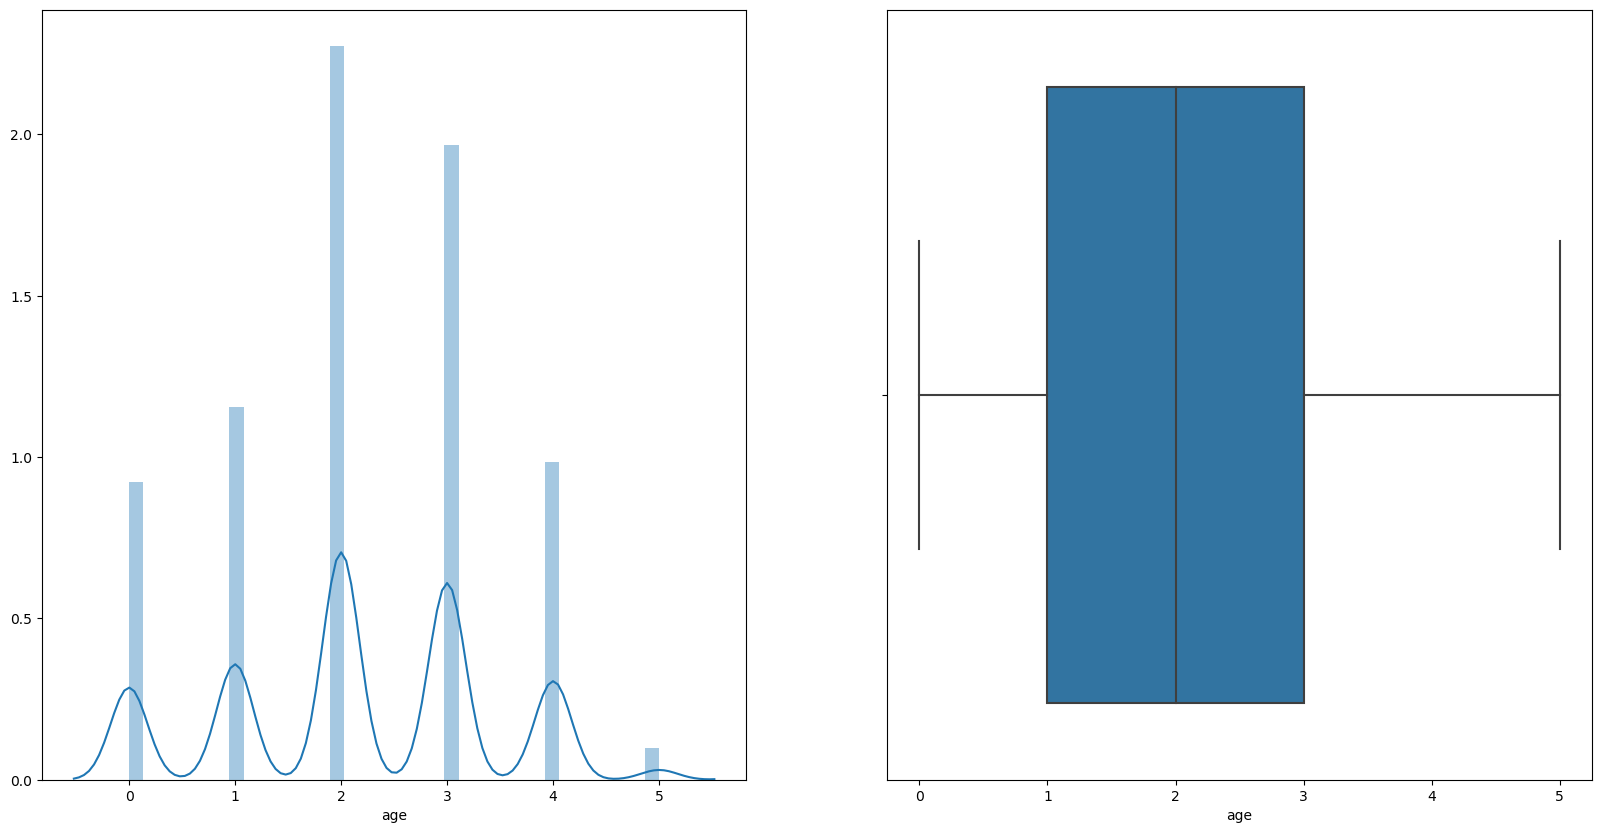

In [98]:
plot_columns(df_anonim, 'age')

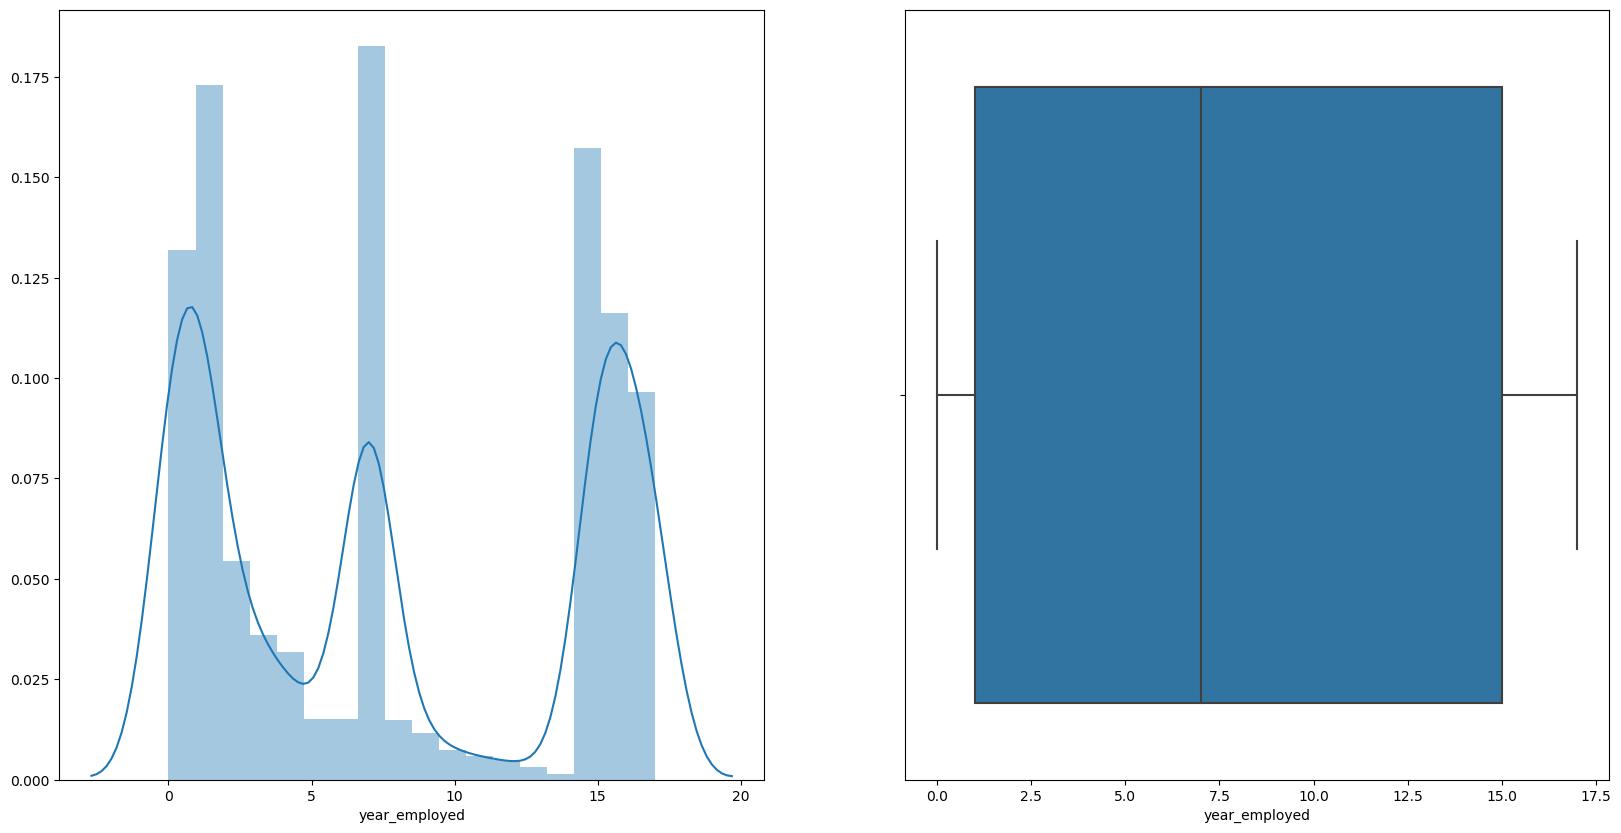

In [99]:
plot_columns(df_anonim, 'year_employed')

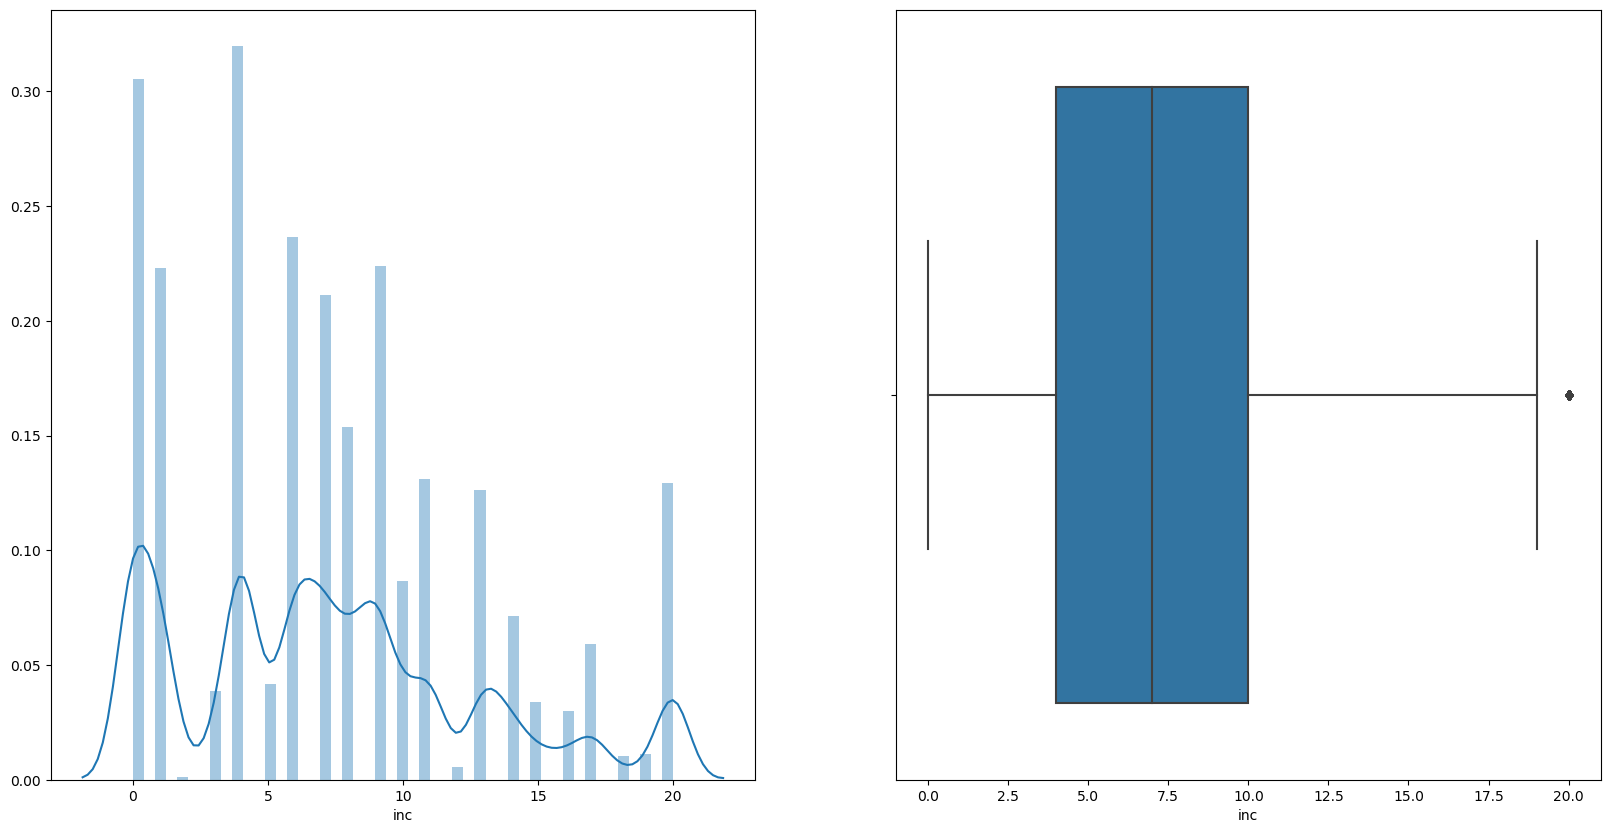

In [100]:
plot_columns(df_anonim, 'inc')

### Important Notes

- The target variable show imbalanced proportion which affects the prediction capability. Although, in a early stage experiments, I trained some models that showed good scoring results, this was misleading due to the fact that confusion matrix and AUC value had poor performances. In order to resolve this issue im going to apply some data cleaning techniques: 
    - remove outliers;
    - reduce dimensionality;

## Data Cleaning

Outlier removal using DBSCAN

In [101]:
# DBSCAN
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps=0.5, min_samples=2)
clusters = outlier_detection.fit_predict(df_anonim)
print("Clusters:", clusters)

# concatenate clusters with customer data
df_anonim['clusters'] = pd.Series(clusters, index=df_anonim.index)
# print(df_anonim)

outliers = df_anonim[df_anonim['clusters']==-1]
print("Number of outliers:", len(outliers))

Clusters: [   0    0    1 ... 3933 3976   -1]
Number of outliers: 1440


In [102]:
df_anonim['clusters'].value_counts()

-1       1440
 3869     136
 3691      80
 3874      72
 3871      60
         ... 
 2109       2
 2125       2
 2221       2
 212        2
 0          2
Name: clusters, Length: 4037, dtype: int64

In [103]:
df_anonim = df_anonim[df_anonim['clusters'] != -1]

In [104]:
df_anonim.shape

(23694, 18)

In [105]:
df_anonim = df_anonim.drop(['clusters'], axis=1)

In [106]:
df_anonim['target'].value_counts()

0    23470
1      224
Name: target, dtype: int64

In [107]:
# target vector - target
y = df_anonim['target']

# feature matrix
X = df_anonim.loc[:, df_anonim.columns != 'target']

In [108]:
from sklearn.model_selection import train_test_split

# training and testing splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)

(18955, 16)
(4739, 16)


Data standardization

In [110]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimensionality reduction using PCA

In [111]:
from sklearn.decomposition import PCA

# reduced dataset dimensionality ir order to select best features and improve training results
pca = PCA(n_components=14)
pca.fit(X_train_scaled)
# transform data accordinh to the chosen components
X_pca_train = pca.transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca_train.shape)))

Original shape: (18955, 16)
Reduced shape: (18955, 14)


In [112]:
pca.explained_variance_ratio_

array([0.19013593, 0.13319504, 0.09927519, 0.08889458, 0.07108592,
       0.06660706, 0.06312322, 0.05039733, 0.04685786, 0.04368349,
       0.04313258, 0.03906111, 0.03433625, 0.02717494])

## Models training

In [113]:
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

#### Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.1)
lr_model.fit(X_pca_train, y_train)

LogisticRegression(C=0.1)

In [115]:
lr_train_score = lr_model.score(X_pca_train, y_train)
print("Train set score: {:.3f}".format(lr_train_score))

lr_test_score = lr_model.score(X_pca_test, y_test)
print("Test set score: {:.3f}".format(lr_test_score))

Train set score: 0.991
Test set score: 0.990


In [116]:
log_auc = roc_auc_score(y_test, lr_model.decision_function(X_pca_test))
print("AUC for Logistic Regression: {:.3f}".format(log_auc))

AUC for Logistic Regression: 0.660


In [117]:
y_lr_pred = lr_model.predict(X_pca_test)

In [118]:
confusion_matrix(y_test, y_lr_pred)

array([[4693,    0],
       [  46,    0]])

In [119]:
res = pd.DataFrame({
    'Model': ['logistic regression'], 
    'Train score': [lr_train_score], 
    'Test score': [lr_test_score],
    'AUC': [log_auc]
})

In [120]:
res

Model  Train score  Test score       AUC
0  logistic regression     0.990609    0.990293  0.659736

<h4> K Nearest Neighbours </h4>

In [121]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_pca_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [122]:
knn_train_score = knn_model.score(X_pca_train, y_train)
print("Train set score: {:.3f}".format(knn_train_score))

knn_test_score = knn_model.score(X_pca_test, y_test)
print("Test set score: {:.3f}".format(knn_test_score))

Train set score: 0.991
Test set score: 0.989


In [123]:
y_knn_pred = knn_model.predict(X_pca_test)

In [124]:
confusion_matrix(y_test, y_knn_pred)

array([[4689,    4],
       [  46,    0]])

In [125]:
knn_auc = roc_auc_score(y_test, knn_model.predict_proba(X_pca_test)[:, 1])
print("AUC for KNN: {:.3f}".format(knn_auc))

AUC for KNN: 0.874


In [126]:
knn_res = pd.DataFrame({
    'Model': ['KNN'], 
    'Train score': [knn_train_score], 
    'Test score': [knn_test_score],
    'AUC': [knn_auc]
})

res = res.append(knn_res, ignore_index=True)

<h4> Support Vector Machine </h4>

In [127]:
from sklearn import svm

param = {'C' : [0.1, 0.5, 1.0, 5.0, 10.0, 50.0]}
svm_model = GridSearchCV(svm.SVC(), param)
svm_model.fit(X_pca_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1.0, 5.0, 10.0, 50.0]})

In [128]:
svm_model.best_estimator_

SVC(C=50.0)

In [129]:
svm_train_score = svm_model.score(X_pca_train, y_train)
print("Train set score: {:.3f}".format(svm_train_score))
svm_test_score = svm_model.score(X_pca_test, y_test)
print("Test set score: {:.3f}".format(svm_test_score))

Train set score: 0.993
Test set score: 0.990


In [130]:
y_svm_pred = svm_model.predict(X_pca_test)

In [131]:
confusion_matrix(y_test, y_svm_pred)

array([[4685,    8],
       [  39,    7]])

In [132]:
svm_auc = roc_auc_score(y_test, svm_model.decision_function(X_pca_test))
print("AUC for SVM: {:.3f}".format(svm_auc))

AUC for SVM: 0.901


In [133]:
svm_res = pd.DataFrame({
    'Model': ['SVM'], 
    'Train score': [svm_train_score], 
    'Test score': [svm_test_score],
    'AUC': [svm_auc]
})

res = res.append(svm_res, ignore_index=True)

In [134]:
res

Model  Train score  Test score       AUC
0  logistic regression     0.990609    0.990293  0.659736
1                  KNN     0.990873    0.989449  0.874459
2                  SVM     0.993036    0.990082  0.900787